# Produce 1D and 2D plots for VV and VH

First, make sure you are running on lxplus (CERN) otherwise the ROOT version will not be correct. Currently this is set to run just VV PFlow+UFO LP noTag.

In [1]:
# Import ROOT specific libraries
import ROOT
from ROOT import TCanvas, TFile, TPaveText
from ROOT import gROOT, gBenchmark
from ROOT import TH1F, THStack
import uproot

Welcome to JupyROOT 6.16/00


In [2]:
# Import useful python libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Next, define some useful information (background names, DSID's for each signal, and a function to return the correct DSID and mass combination for a given signal).

In [3]:
BKGS = ["Wjets","ttbar","stop","Diboson","Zjets"]

## Useful DSIDs + masses:
hvtwz_dsid = ["302246","302254","302261","302263","302265"] #1,1.8,3,4,5 TeV  
hvtwz_mass = ["1","1.8",'3','4','5']
hvtzh_dsid = ["302423","302429","302433","302436","302439"] 
hvtzh_mass = ["1.2","1.8","2.4","3","4.5"]
        
vbfhvt_dsid = ["307710","307720","307725","307726","307727"] #1,2,3,3.5,4 TeV 
vbfhvt_mass = ['1','2','3','3.5','5']
rsg_dsid =["303307","303317","303322","303323","303325"] #1,2,3,3.5,5 TeV  
rsg_mass = ['1','2','3','3.5','5']
vbfrsg_dsid =["451189","451195","451198","451200","451202"] #1,2,3,4,5 TeV
vbfrsg_mass = ['1','2','3','4','5']
radion_dsid =["451210","451216","451219","451221","451223"] #1,2,3,4,5  
radion_mass = ['1','2','3','4','5']
vbfradion_dsid =["451231","451237","451240","451242","451244"] #1,2,3,4,5 
vbfradion_mass = ['1','2','3','4','5']

def get_dsid(signal):
    '''Function used to return the correct DSID and mass combination for a specific signal
        Input: signal (string)
        Output: DSID, mass (string)
    '''
    if signal == "HVTWZ":
        return hvtwz_dsid, hvtwz_mass
    if signal == "HVTZH":
        return hvtzh_dsid, hvtzh_mass
    if signal == "RSG":
        return rsg_dsid, rsg_mass
    if signal == "Radion":
        return radion_dsid, radion_mass
    if signal =="VBFHVT":
        return vbfhvt_dsid, vbfhvt_mass
    if signal == "VBFRSG":
        return vbfrsg_dsid, vbfrsg_mass
    if signal == "VBFRadion":
        return vbfradion_dsid, vbfradion_mass

In [4]:
def make_histnames(signal,tag,purity,kind,add,sr,dist):
    '''Function used to make histogram names
        Input: 
            - signal (HVT or Bkg for now)
            - tagging (tagged, untagged, notag)
            - purity (LP or HP)
            - kind (merg or res)
            - add (one, two, none)
            - sr (signal region)
            - dist (distribution type)
        Output: list of histogram names
    '''
    mysig = []
    mybkg = []

    if signal == "RSG":
        for i in rsg_dsid:
#             print(" better not here")
            tempname = "RSG_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            mysig.append(tempname)
#         print(mysig)
        return mysig
    if signal == "HVTWZ":
        print("test")
        for i in hvtwz_dsid:
            tempname = "HVTWZ_Nominal_Pass_Merg"+purity+"_GGF_WZ_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_"+dist+";"
            mysig.append(tempname)
#         print(mysig)
        return mysig
    if signal == "Radion":
        for i in radion_dsid:
            tempname = "Radion_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            mysig.append(tempname)
#         print(mysig)
        return mysig
    if signal == "VBFRSG":
        for i in vbfrsg_dsid:
#             print("here")
            tempname = "VBFRSG_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            mysig.append(tempname)
#         print(mysig)
        return mysig
    if signal == "VBFHVT":
        for i in vbfhvt_dsid:
            tempname = "VBFHVTWZ_Nominal_Pass_Merg"+purity+"_VBF_WZ_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            mysig.append(tempname)
#         print(mysig)
        return mysig
    if signal == "VBFRadion":
        for i in vbfradion_dsid:
#             tempname = "VBFRadion_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag"_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            tempname = "VBFRadion_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50 && DSID=="+i+"_X_boosted_m;"
            mysig.append(tempname)
        print(mysig)
        return mysig

    if signal == "bkg":
        for i in BKGS:
#             print("not HVT or VBF HVT")
            tempname = i+"_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50_X_boosted_m"
            mybkg.append(tempname)
        print(mybkg)
        return mybkg
    if signal == "bkg_hvt":
        for i in BKGS:
#             print("HVT or VBFHVT")
            tempname = i+"_Nominal_Pass_Merg"+purity+"_GGF_WZ_SR==1 && std::abs(weight)<=50_"+dist+";"
#             tempname = i+"_Nominal_Pass_Merg"+purity+"_GGF_ZZ_"+tag+"_SR==1 && std::abs(weight)<=50_"+dist+";"
            mybkg.append(tempname)
        print(mybkg)
        return mybkg

    if signal == "HVTZH":
        for i in hvtzh_dsid:
            if add == -1:
                tempname = "HVTZH_Nominal_Pass_"+kind+"_VH_"+tag+"_SR"+sr+" && std::abs(weight)<=50 && DSID=="+i+"_"+dist+";"
            else:
                tempname = "HVTZH_Nominal_Pass_"+kind+"_VH_"+tag+add+"_SR"+sr+" && std::abs(weight)<=50 && DSID=="+i+"_"+dist+";"
            mysig.append(tempname)
        print("From make_histnames:",mysig)
        return mysig

    if signal == "bkg_hvtzh":
        print(tag)
        for i in BKGS:
            tempname = i+"_Nominal_Pass_"+kind+"_VH_"+tag+add+"_SR && std::abs(weight)<=50_"+dist+";"
            mybkg.append(tempname)
        print(mybkg)
        return mybkg
    
    
    

In [5]:
# def plot_data_MC(file1,file2,signal,tag="",purity="",kind="",add=-1,dist=""):
def plot_data_MC(file1,file2,dist=""):
    '''Function used to plot a 1D histogram of the signal + stacked bakground
        Input: 
            - signal file
            - bkg file
            - distribution type
        Output: 1D plot
    '''
    #f2 is bkg, f1 is signal
    
    # Initialize variables
    analysis = ""
    tag = ''
    purity = ''
    kind = ''
    add = '0add'
    sr = ""
    s = file1
    
    if "VV" in s:
        analysis = "VV"
        if "HVT" in s:
            signal = "HVTWZ"
    if "VH" in s:
        analysis = "VH"
        if "HVT" in s:
            signal = "HVTZH"
    if "oneTagged" in s:
        tag = "1tag"
    if "twoTagged" in s:
        tag = "2tag"
    if "LP" in s:
        purity = "LP"
    if "HP" in s:
        purity = "HP"
    if "Merg" in s:
        kind = "Merg"
    if "Res" in s:
        kind = "Res"
    if "noAdd" in s:
        add = ""
    if "oneAdd" in s:
        add = "1add"
    
    if tag == "":
        print("WARNING!! Tagging requirement not set!")
    if purity == "":
        print("WARNING!! Purity requirement not set!")
        purity = ""
    
    print(signal)
    
    # Make file name include .root
    fname1 = file1 + ".root"
    fname2 = file2 + ".root"

    # Open files
    f1 = ROOT.TFile.Open(fname1,"read")
    f2 = ROOT.TFile.Open(fname2,"read")
    
    # Create canvas
    c1 = ROOT.TCanvas('canvas', '', 500, 500)
    c1.cd()

    # Initialize stacked histogram
    ths1 = THStack("hs","  ")
    leg = ROOT.TLegend(0.5,0.7,0.8,0.95) #x_min, x_max, y_min, y_max
    leg.SetBorderSize(0);
    leg.SetTextFont(50);
    leg.SetTextSize(0.02);
    leg.SetLineColor(1);
    leg.SetLineStyle(1);
    leg.SetLineWidth(1);
    leg.SetFillColor(0);
  
    # Get histogram names
    if signal == "HVTWZ":
        histnames = make_histnames(signal,tag,purity,kind,add,sr,dist)
        bkgnames = make_histnames("bkg_hvt",tag,purity,kind,add,sr,dist)
    if signal == "VBFHVT":
        bkgnames = make_histnames("bkg_hvt",tag,purity,kind,add,sr,dist)
    if signal == "HVTZH":
        histnames = make_histnames(signal,tag,purity,kind,add,sr,dist)
        bkgnames = make_histnames("bkg_hvtzh",tag,purity,kind,add,sr,dist)
        
    # Loop through the bkg histogram names and stack them
    for i in bkgnames:
        print(i)
        hist = f2.Get(i)
        print(type(hist))
        for word in i.split("_")[:1]:
            tempname = "hist_MC"+word
            if word == "ttbar":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kAzure-4)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")

            if word == "Wjets":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kRed-9)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")

            if word == "stop":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kYellow)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")

            if word == "Diboson":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kRed-4)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")

            if word == "Zjets":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kGreen-9)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")

            # Add each to the histogram
            ths1.Add(tempname)
    # Draw the histogram
    ths1.Draw("hist")
    leg.Draw()
    
    # Scale up the signal so it's visible
    scale = 100
    # Get the DSID's and corresponding mass points
    dsid, mass = get_dsid(signal)
    
    # Create TGraphs of each signal mass
    color = [ROOT.kRed,ROOT.kBlue,ROOT.kCyan,ROOT.kGreen,ROOT.kOrange]
    gr1 = ROOT.TGraph()
    gr2 = ROOT.TGraph()
    gr3 = ROOT.TGraph()
    gr4 = ROOT.TGraph()
    gr5 = ROOT.TGraph()
    gr = [gr1,gr2,gr3,gr4,gr5]

    # Sainity check beacuse they all have different names
    dataname = histnames[0]
    hist_data = f1.Get(dataname)
    print("what is this",str(type(hist_data)))
    
    if (str(type(hist_data)) == "<class 'ROOT.TObject'>"):
        sr = "==1"
        histnames = make_histnames(signal,tag,purity,kind,add,sr,dist)
    
    # Loop through the DSIDs and add the masses to the histograms
    for k in range(len(dsid)):
        dataname = histnames[k]
        legendname = str(mass[k])+ "TeV "+signal+" signal (x"+str(scale)+")"

        hist_data = f1.Get(dataname)
        print(type(hist_data))
        print(type(f1))
        hist_data.Scale(scale)
        
        for i in range(hist_data.GetNbinsX()):
            gr[k].SetPoint(gr[k].GetN(),hist_data.GetBinCenter(i),hist_data.GetBinContent(i))
        gr[k].SetLineColor(color[k]);
        if (gr[k].GetN() > 1):
            gr[k].Draw("L")
            gr[k].SetLineWidth(2)
            gr[k].GetXaxis().SetRangeUser(0, 5500)
        leg.AddEntry(gr[k],legendname,"l")
        

    # Set the title based on the distribution
    if(dist == "X_merged_m"):
        ths1.GetXaxis().SetTitle(r"m_{VH} [GeV]")
    if(dist == "X_boosted_m"):
        ths1.GetXaxis().SetTitle(r"m_{VV} [GeV]")
    if(dist == "met"):
        ths1.GetXaxis().SetTitle("met [GeV]")
    if(dist == "METSig"):
        ths1.GetXaxis().SetTitle("METSig")
    if(dist == "fatjet_D2"):
        ths1.GetXaxis().SetTitle(r' D_{2} ')
    if(dist == "fatjet_pt"):
        ths1.GetXaxis().SetTitle(r"p_{T} [GeV]")
    if(dist == "fatjet_m"):
        ths1.GetXaxis().SetTitle(r"m_{jj} [GeV]")
    
    ths1.GetYaxis().SetTitle("No. Events")
    
    # Set some limits
    ths1.GetXaxis().SetRangeUser(0, 5500)

    # Log the y-axis and draw
    c1.SetLogy()
    c1.Draw()
    if(dist == "X_merged_m"):
        dist = "mVH"
    if(dist == "X_boosted_m"):
        dist = "mVV"
    name = "../Results/"+file1+"_"+dist+".pdf"
    c1.SaveAs(name) # Save the plot
    print("---- Done with ",name,"---------")
    

Make 1D histograms (NOTE: TFile is very weird in python+ROOT so move the ROOT files to the same location as this notebook to run because otherwise it's can't find it and will crash)

In [6]:
# Make lists of the files and distributions to loop through
dists = ["fatjet_m","fatjet_pt","fatjet_D2","X_boosted_m","met","METSig"]

sname = ['VV_SR_PFlow_UFO_HVT_LP_noTag']
bname = ['VV_SR_PFlow_UFO_Bkg_LP_noTag']


VV_SR_PFlow_UFO_HVT_LP_noTag
VV_SR_PFlow_UFO_Bkg_LP_noTag
WARNING!! Tagging requirement not set!
HVTWZ
test
['Wjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;', 'ttbar_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;', 'stop_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;', 'Diboson_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;', 'Zjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;']
Wjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;
<class 'ROOT.TH1D'>
ttbar_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;
<class 'ROOT.TH1D'>
stop_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;
<class 'ROOT.TH1D'>
Diboson_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;
<class 'ROOT.TH1D'>
Zjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_fatjet_m;
<class 'ROOT.TH1D'>
what is this <class 'ROOT.TH1D'>
<class 'ROO

Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_fatjet_m.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_fatjet_pt.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_fatjet_D2.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_mVV.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_met.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_HVT_LP_noTag_METSig.pdf has been created


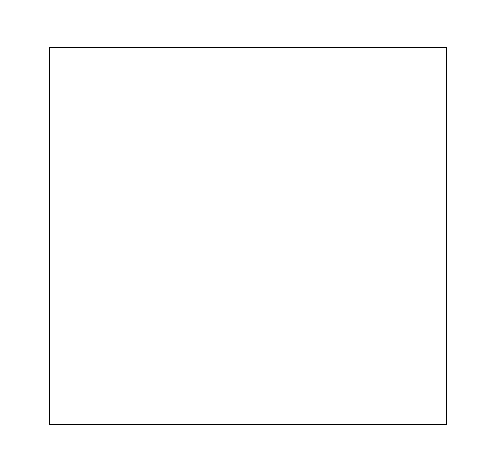

In [7]:
for myDist in dists:
    for i in range(len(sname)):
        print(sname[i])
        print(bname[i])
        plot_data_MC(sname[i],bname[i],myDist)

Now, make 2D histograms

In [8]:
# def plot_data_MC(file1,file2,signal,tag="",purity="",kind="",add=-1,dist=""):
def plot_2D(file2,dist=""):
    '''Function used to plot a 2D histogram of a single bkg
        Input: 
            - bkg file
            - distribution type (2D)
        Output: 2D plot
    '''
    #f2 is bkg, f1 is signal
    
    # Initialize variables
    analysis = ""
    tag = ''
    purity = ''
    kind = ''
    add = '0add'
    sr = ""
    s = file2
    
    if "VV" in s:
        analysis = "VV"
        if "HVT" in s:
            signal = "HVTWZ"
        if "Tagged" in s:
            tag = "Tag"
        if "Untagged" in s:
            tag = "Untag"
    if "VH" in s:
        analysis = "VH"
        if "HVT" in s:
            signal = "HVTZH"
        if "oneTagged" in s:
            tag = "1tag"
        if "twoTagged" in s:
            tag = "2tag"
    
    if "LP" in s:
        purity = "LP"
    if "HP" in s:
        purity = "HP"
    if "Merg" in s:
        kind = "Merg"
    if "Res" in s:
        kind = "Res"
    if "noAdd" in s:
        add = ""
    if "oneAdd" in s:
        add = "1add"
        
    if tag == "":
        print("WARNING!! Tagging requirement not set!")
    if purity == "":
        print("WARNING!! Purity requirement not set!")
        purity = ""
    
    # Make file name include .root
    fname2 = file2 + ".root"

    # Open files
    f2 = ROOT.TFile.Open(fname2,"read")
    
    # Create a canvas
    c1 = ROOT.TCanvas('canvas', '', 1000, 600)
    c1.cd()

    # Create a stacked histogram
    ths1 = THStack("hs","  ")
    leg = ROOT.TLegend(0.5,0.7,0.8,0.95) #x_min, x_max, y_min, y_max
    leg.SetBorderSize(0);
    leg.SetTextFont(50);
    leg.SetTextSize(0.02);
    leg.SetLineColor(1);
    leg.SetLineStyle(1);
    leg.SetLineWidth(1);
    leg.SetFillColor(0);

    # Get the histogram names
    bkgnames = make_histnames("bkg_hvt",tag,purity,kind,add,sr,dist)

    
    myword = ''
    
    # Loop through the bkg histogram names and only plot Zjets as an example (can change if needed)
    for i in bkgnames:
        print(i)
        hist = f2.Get(i)
        print(type(hist))
        for word in i.split("_")[:1]:
            tempname = "hist_MC"+word
            if word == "ttbar":
                pass
#                 tempname = hist.Clone()
#                 tempname.SetFillColor(ROOT.kAzure-4)
#                 tempname.SetLineStyle(1)
#                 leg.AddEntry(tempname,word,"f")
#                 ths1.Add(tempname)

            if word == "Wjets":
                pass
#                 tempname = hist.Clone()
#                 tempname.SetFillColor(ROOT.kRed-9)
#                 tempname.SetLineStyle(1)
#                 leg.AddEntry(tempname,word,"f")

            if word == "stop":
                pass
#                 tempname = hist.Clone()
#                 tempname.SetFillColor(ROOT.kYellow)
#                 tempname.SetLineStyle(1)
#                 leg.AddEntry(tempname,word,"f")

            if word == "Diboson":
                pass
#                 tempname = hist.Clone()
#                 tempname.SetFillColor(ROOT.kRed-4)
#                 tempname.SetLineStyle(1)
#                 leg.AddEntry(tempname,word,"f")

            if word == "Zjets":
                tempname = hist.Clone()
                tempname.SetFillColor(ROOT.kGreen-9)
                tempname.SetLineStyle(1)
                leg.AddEntry(tempname,word,"f")
                tempname.SetMinimum(1E-7)
                tempname.SetMaximum(10)
                ths1.Add(tempname)
                myword = word
    
    # Draw using a specific ROOT format - similar to a heatmap
    ths1.Draw("COLZ")
    
    # Set the title based on the distribution
    ths1.GetYaxis().SetTitle("No. Events")
    if(dist == "X_merged_m"):
        ths1.GetXaxis().SetTitle(r"m_{VH} [GeV]")
    if(dist == "X_boosted_m"):
        ths1.GetXaxis().SetTitle(r"m_{VV} [GeV]")
    if(dist == "met"):
        ths1.GetXaxis().SetTitle("met [GeV]")
    if(dist == "METSig"):
        ths1.GetXaxis().SetTitle("METSig")
    if(dist == "fatjet_D2"):
        ths1.GetXaxis().SetTitle(r' D_{2} ')
    if(dist == "fatjet_pt"):
        ths1.GetXaxis().SetTitle(r"p_{T} [GeV]")
    if(dist == "fatjet_m"):
        ths1.GetXaxis().SetTitle(r"m_{jj} [GeV]")
    if(dist == "fatjet_pt_D2"):
        ths1.GetYaxis().SetTitle(r"p_{T} [GeV]")
        ths1.GetXaxis().SetTitle(r' D_{2} ')
    if(dist == "fatjet_pt_mJ"):
        ths1.GetYaxis().SetTitle(r"p_{T} [GeV]")
        ths1.GetXaxis().SetTitle(r"m_{J} [GeV]")
    if(dist == "METSig_mVV"):
        ths1.GetYaxis().SetTitle('METSig')
        ths1.GetXaxis().SetTitle(r"m_{VV} [GeV]")
    
    # Log the z-axis and draw
    c1.SetLogz()
    c1.Draw()
    if(dist == "X_merged_m"):
        dist = "mVH"
    if(dist == "X_boosted_m"):
        dist = "mVV"
    name = "../Results/"+file2+"_"+dist+"_"+myword+"_2D"+".pdf"
    c1.SaveAs(name) # Save the plot
    print("---- Done with ",name,"---------")
    

WARNING!! Tagging requirement not set!
['Wjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;', 'ttbar_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;', 'stop_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;', 'Diboson_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;', 'Zjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;']
Wjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;
<class 'ROOT.TH2D'>
ttbar_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;
<class 'ROOT.TH2D'>
stop_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;
<class 'ROOT.TH2D'>
Diboson_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;
<class 'ROOT.TH2D'>
Zjets_Nominal_Pass_MergLP_GGF_WZ_SR==1 && std::abs(weight)<=50_METSig_mVV;
<class 'ROOT.TH2D'>
---- Done with  ../Results/VV_SR_PFlow_UFO_Bkg_LP_noTag_METSig_mVV_Zjets_2D.pdf ---------


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../Results/VV_SR_PFlow_UFO_Bkg_LP_noTag_METSig_mVV_Zjets_2D.pdf has been created


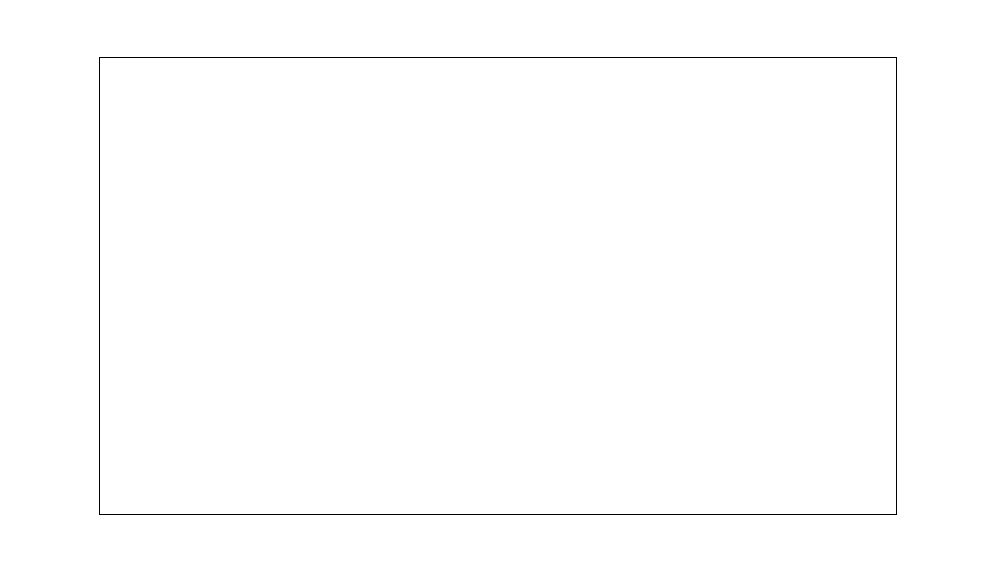

In [9]:
plot_2D("VV_SR_PFlow_UFO_Bkg_LP_noTag","METSig_mVV")